In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import folium
from folium import plugins
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



In [2]:
pip install folium

   ---------------------------------------- 0.0/100.0 kB ? eta -:--:--
   -------- ------------------------------- 20.5/100.0 kB ? eta -:--:--
   ------------------------ --------------- 61.4/100.0 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 100.0/100.0 kB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
df = pd.read_csv("C:/Users/hatio/Desktop/CI2/Analyse et traitement des donnees/Autre/Final/result/google_maps_data_hôtel_rabat.csv")

In [10]:
df.describe()


,price,reviews_count,reviews_average,latitude,longitude
count,76.000000,79.000000,79.000000,80.000000,80.000000
mean,806.644737,467.417722,4.103797,34.008894,-6.842724
std,575.215454,1078.001732,0.584949,0.039610,0.035873
min,208.000000,1.000000,1.900000,33.805554,-7.056786
25%,390.250000,30.000000,3.750000,34.005164,-6.846367
50%,755.000000,119.000000,4.200000,34.020807,-6.837898
75%,1089.000000,449.000000,4.550000,34.026060,-6.834738
max,3296.000000,6505.000000,5.000000,34.042070,-6.690403


In [11]:
df.describe(include=['object'])


,name,address,website,phone_number
count,80,80,47,75
unique,74,74,36,66
top,Hôtel Mercure Rabat Sheherazade,"21 Rue de Tunis, Rabat 10000",all.accor.com,0661-592422
freq,2,2,6,4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             80 non-null     object 
 1   address          80 non-null     object 
 2   website          47 non-null     object 
 3   phone_number     75 non-null     object 
 4   price            76 non-null     float64
 5   reviews_count    79 non-null     float64
 6   reviews_average  79 non-null     float64
 7   latitude         80 non-null     float64
 8   longitude        80 non-null     float64
dtypes: float64(5), object(4)
memory usage: 5.8+ KB


In [7]:
df.isna().sum()

name                0
address             0
website            33
phone_number        5
price               4
reviews_count       1
reviews_average     1
latitude            0
longitude           0
dtype: int64

In [8]:
df.isnull()

,name,address,website,phone_number,price,reviews_count,reviews_average,latitude,longitude
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
75,False,False,False,False,False,False,False,False,False
76,False,False,False,False,False,False,False,False,False
77,False,False,True,False,False,False,False,False,False
78,False,False,True,True,False,True,True,False,False


In [9]:
df

,name,address,website,phone_number,price,reviews_count,reviews_average,latitude,longitude
0,Hôtel Mercure Rabat Sheherazade,"21 Rue de Tunis, Rabat 10000",all.accor.com,05377-22226,920.0,1308.0,4.4,34.019319,-6.823416
1,Dar Kika Salam By DKS,"Mohammed, 7 Rue Sidi Ahmed Daoui, Rabat 10000",dks.ma,05377-61729,792.0,77.0,4.6,34.029295,-6.837400
2,Hotel Rabat,"21، شارع شالة حسان, Rabat 10000",hotelrabat.ma,05377-00071,1696.0,609.0,3.9,34.020761,-6.830696
3,Hotel Paris,"N1, 139 Av. Hassan II, Rabat 10060",NaN,05377-23868,270.0,241.0,2.9,34.020854,-6.841980
4,Hôtel Velleda,"106 Av. Allal Ben Abdellah, Rabat 10000",NaN,05377-69531,448.0,155.0,3.5,34.017217,-6.834849
...,...,...,...,...,...,...,...,...,...
75,Ubay Hôtel,"257C+638, Rabat",ubayhotel.morocco-ma.website,05377-34034,714.0,118.0,3.3,34.013033,-6.830363
76,my city hotel,"Rue Bejaad, Rabat",mycity-rentinn.ma,0664-696664,847.0,12.0,4.7,34.015805,-6.829858
77,Naima's House,"avenue sidi fateh rue doura numero 10, Rabat 1...",NaN,0613-482067,411.0,45.0,3.6,34.026032,-6.839189
78,DAR SABA,"2 Rue Benjelloule, Rabat",NaN,NaN,329.0,NaN,NaN,34.026285,-6.834178


In [10]:
df.head()

,name,address,website,phone_number,price,reviews_count,reviews_average,latitude,longitude
0,Hôtel Mercure Rabat Sheherazade,"21 Rue de Tunis, Rabat 10000",all.accor.com,05377-22226,920.0,1308.0,4.4,34.019319,-6.823416
1,Dar Kika Salam By DKS,"Mohammed, 7 Rue Sidi Ahmed Daoui, Rabat 10000",dks.ma,05377-61729,792.0,77.0,4.6,34.029295,-6.837400
2,Hotel Rabat,"21، شارع شالة حسان, Rabat 10000",hotelrabat.ma,05377-00071,1696.0,609.0,3.9,34.020761,-6.830696
3,Hotel Paris,"N1, 139 Av. Hassan II, Rabat 10060",NaN,05377-23868,270.0,241.0,2.9,34.020854,-6.841980
4,Hôtel Velleda,"106 Av. Allal Ben Abdellah, Rabat 10000",NaN,05377-69531,448.0,155.0,3.5,34.017217,-6.834849


In [11]:
# Copy the DataFrame to avoid modifying the original
df_cp = df.copy()

# Impute missing values in numerical columns with both mean and median
numerical_columns = df_cp.select_dtypes(include=['float64', 'int64']).columns
df_cp[numerical_columns] = df_cp[numerical_columns].fillna(df_cp[numerical_columns].mean())  # Fill with mean


In [12]:
df_cp.isna().sum()

name                0
address             0
website            33
phone_number        5
price               0
reviews_count       0
reviews_average     0
latitude            0
longitude           0
dtype: int64

In [13]:
df_med=df.copy()

In [14]:
# Impute missing values in numerical columns with both mean and median
numeric_columns = df_med.select_dtypes(include=['float64', 'int64']).columns
df_med[numeric_columns] = df_med[numeric_columns].fillna(df_med[numeric_columns].mean())  # Fill with mean

In [15]:
df_med.isna().sum()

name                0
address             0
website            33
phone_number        5
price               0
reviews_count       0
reviews_average     0
latitude            0
longitude           0
dtype: int64

In [16]:
mode_phone = df["phone_number"].mode()[0]

df["phone_number"].fillna(mode_phone, inplace=True)


In [17]:
df__cp_website=df.copy()

df__cp_website['website'].fillna("Not available", inplace=True)

In [18]:
df.isna().sum()

name                0
address             0
website            33
phone_number        0
price               4
reviews_count       1
reviews_average     1
latitude            0
longitude           0
dtype: int64

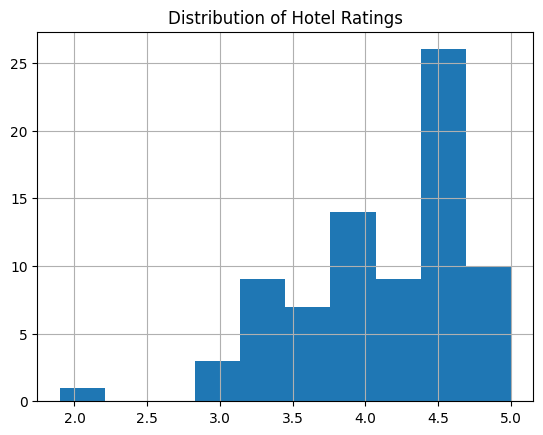

In [19]:
df['reviews_average'].hist()
plt.title("Distribution of Hotel Ratings")
plt.show()

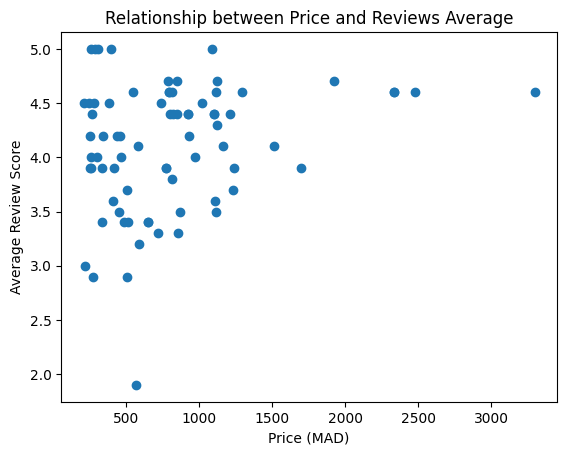

In [20]:
plt.scatter(df["price"], df["reviews_average"])
plt.xlabel("Price (MAD)")
plt.ylabel("Average Review Score")
plt.title("Relationship between Price and Reviews Average")
plt.show()

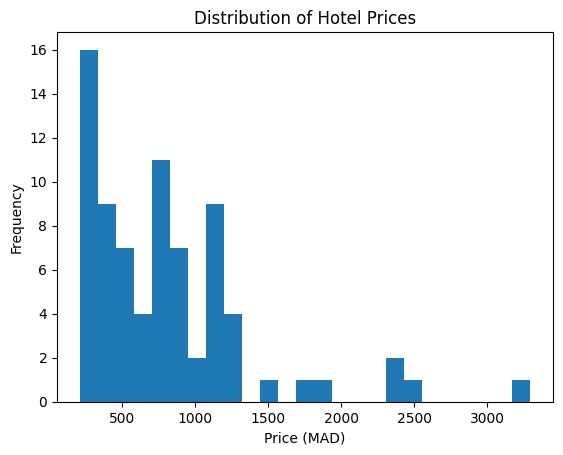

In [21]:
# Distribution of price
plt.hist(df["price"], bins=25)
plt.xlabel("Price (MAD)")
plt.ylabel("Frequency")
plt.title("Distribution of Hotel Prices")
plt.show()


In [23]:
"""import folium
from folium.plugins import MarkerCluster

map = folium.Map(location=[df["latitude"].mean(), df["longitude"].mean()], zoom_start=12)
marker_cluster = MarkerCluster().add_to(map)

for lat, lng in zip(df["latitude"], df["longitude"]):
    folium.Marker([lat, lng]).add_to(marker_cluster)

map.save("hotel_clusters_map.html")  # Save as interactive HTML file"""
from folium.plugins import MarkerCluster

# Create the map with markers and clusters as before
map = folium.Map(location=[df["latitude"].mean(), df["longitude"].mean()], zoom_start=12)
marker_cluster = MarkerCluster().add_to(map)
for lat, lng in zip(df["latitude"], df["longitude"]):
    folium.Marker([lat, lng]).add_to(marker_cluster)

# Display the map directly in the notebook
map



In [24]:
# Create a new map for the heatmap
heatmap_map = folium.Map(location=[df["latitude"].mean(), df["longitude"].mean()], zoom_start=12)

# Generate heatmap layer
heatmap = plugins.HeatMap(
    data=list(zip(df["latitude"], df["longitude"])),
    radius=15,  # Adjust radius for heatmap density
    max_zoom=15,
).add_to(heatmap_map)

# Display the heatmap
heatmap_map

In [25]:


map = folium.Map(location=[df["latitude"].mean(), df["longitude"].mean()])
for i in range(len(df)):
    folium.Marker([df.loc[i, "latitude"], df.loc[i, "longitude"]]).add_to(map)
map


In [26]:
df["location"] = df["address"].str.extract(r"(Rabat \d+)")
df

,name,address,website,phone_number,price,reviews_count,reviews_average,latitude,longitude,location
0,Hôtel Mercure Rabat Sheherazade,"21 Rue de Tunis, Rabat 10000",all.accor.com,05377-22226,920.0,1308.0,4.4,34.019319,-6.823416,Rabat 10000
1,Dar Kika Salam By DKS,"Mohammed, 7 Rue Sidi Ahmed Daoui, Rabat 10000",dks.ma,05377-61729,792.0,77.0,4.6,34.029295,-6.837400,Rabat 10000
2,Hotel Rabat,"21، شارع شالة حسان, Rabat 10000",hotelrabat.ma,05377-00071,1696.0,609.0,3.9,34.020761,-6.830696,Rabat 10000
3,Hotel Paris,"N1, 139 Av. Hassan II, Rabat 10060",NaN,05377-23868,270.0,241.0,2.9,34.020854,-6.841980,Rabat 10060
4,Hôtel Velleda,"106 Av. Allal Ben Abdellah, Rabat 10000",NaN,05377-69531,448.0,155.0,3.5,34.017217,-6.834849,Rabat 10000
...,...,...,...,...,...,...,...,...,...,...
75,Ubay Hôtel,"257C+638, Rabat",ubayhotel.morocco-ma.website,05377-34034,714.0,118.0,3.3,34.013033,-6.830363,NaN
76,my city hotel,"Rue Bejaad, Rabat",mycity-rentinn.ma,0664-696664,847.0,12.0,4.7,34.015805,-6.829858,NaN
77,Naima's House,"avenue sidi fateh rue doura numero 10, Rabat 1...",NaN,0613-482067,411.0,45.0,3.6,34.026032,-6.839189,Rabat 10000
78,DAR SABA,"2 Rue Benjelloule, Rabat",NaN,0661-592422,329.0,NaN,NaN,34.026285,-6.834178,NaN


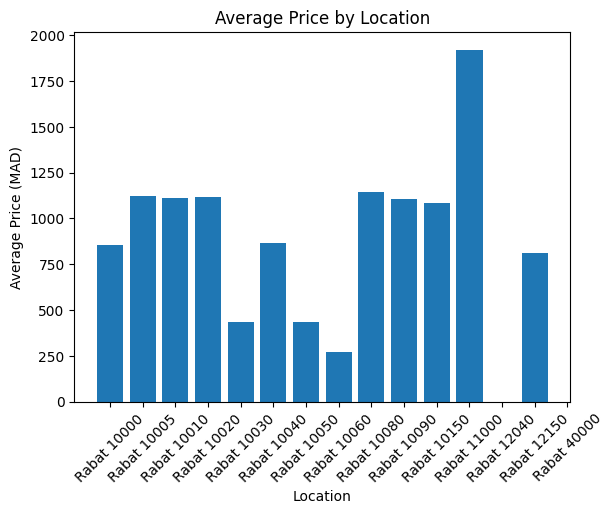

In [27]:
# Calculate average prices by location
avg_prices_by_location = df.groupby("location")["price"].mean()

# Create a bar chart
plt.bar(avg_prices_by_location.index.str[:20], avg_prices_by_location.values)
# Similarly for boxplots
plt.xlabel("Location")
plt.ylabel("Average Price (MAD)")
plt.title("Average Price by Location")
plt.xticks(rotation=45)  # Rotate location labels for readability
plt.show()


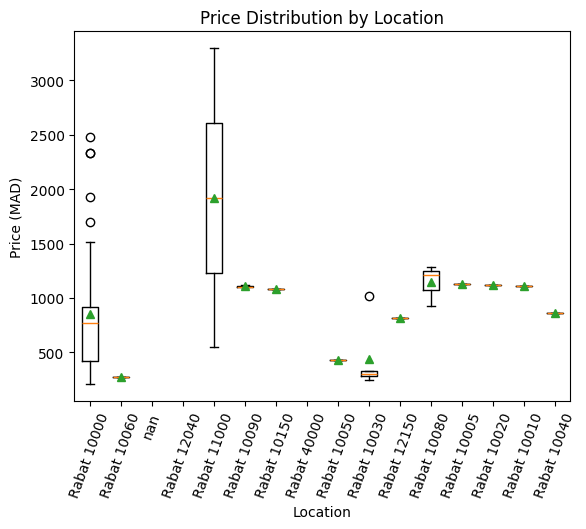

In [32]:

# Filter out NaN values 


price_data_by_location = [df[df["location"] == loc]["price"].dropna() for loc in df["location"].unique()]



# Create the boxplot
plt.boxplot(price_data_by_location,labels=df["location"].unique(),showmeans=True)
plt.xlabel("Location")
plt.ylabel("Price (MAD)")
plt.title("Price Distribution by Location")
plt.xticks(rotation=70)
plt.show()

In [33]:
data_ffill = df.copy()
val_const = 12
column_num = data_ffill.select_dtypes(include=['float64', 'int64']).columns
data_ffill [column_num] = data_ffill[column_num].fillna(val_const).ffill()

data_ffill.head(4)


,name,address,website,phone_number,price,reviews_count,reviews_average,latitude,longitude,location
0,Hôtel Mercure Rabat Sheherazade,"21 Rue de Tunis, Rabat 10000",all.accor.com,05377-22226,920.0,1308.0,4.4,34.019319,-6.823416,Rabat 10000
1,Dar Kika Salam By DKS,"Mohammed, 7 Rue Sidi Ahmed Daoui, Rabat 10000",dks.ma,05377-61729,792.0,77.0,4.6,34.029295,-6.837400,Rabat 10000
2,Hotel Rabat,"21، شارع شالة حسان, Rabat 10000",hotelrabat.ma,05377-00071,1696.0,609.0,3.9,34.020761,-6.830696,Rabat 10000
3,Hotel Paris,"N1, 139 Av. Hassan II, Rabat 10060",NaN,05377-23868,270.0,241.0,2.9,34.020854,-6.841980,Rabat 10060


In [34]:

data_bfill=df.copy()
val_const = 8
column_num = data_bfill.select_dtypes(include=['float64', 'int64']).columns
data_bfill[column_num] = data_bfill[column_num].fillna(val_const).bfill()

data_bfill.head(4)

,name,address,website,phone_number,price,reviews_count,reviews_average,latitude,longitude,location
0,Hôtel Mercure Rabat Sheherazade,"21 Rue de Tunis, Rabat 10000",all.accor.com,05377-22226,920.0,1308.0,4.4,34.019319,-6.823416,Rabat 10000
1,Dar Kika Salam By DKS,"Mohammed, 7 Rue Sidi Ahmed Daoui, Rabat 10000",dks.ma,05377-61729,792.0,77.0,4.6,34.029295,-6.837400,Rabat 10000
2,Hotel Rabat,"21، شارع شالة حسان, Rabat 10000",hotelrabat.ma,05377-00071,1696.0,609.0,3.9,34.020761,-6.830696,Rabat 10000
3,Hotel Paris,"N1, 139 Av. Hassan II, Rabat 10060",NaN,05377-23868,270.0,241.0,2.9,34.020854,-6.841980,Rabat 10060


In [13]:
data2 = df.copy()

In [14]:


categorical_columns = data2.select_dtypes(include=['object']).columns
categorical_data = data2[categorical_columns].drop("website", axis=1)  



#
numerical_columns = data2.select_dtypes(include=['float64', 'int64']).columns
imputed_data=data2[numerical_columns] = data2[numerical_columns].fillna(data2[numerical_columns].mean())  # Fill with mean


scaler = StandardScaler()
scaled_data = scaler.fit_transform(imputed_data)
pca = PCA(n_components=2)                                         # Reduce to 2 dimensions for visualization
pca_components = pca.fit_transform(scaled_data)
print(pca.explained_variance_ratio_)





[0.36078718 0.24876793]


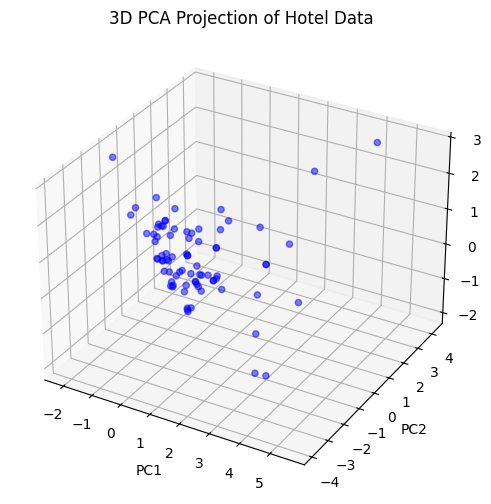

In [15]:

pca = PCA(n_components=3)  # Reduce to 3 dimensions for 3D visualization
pca_components = pca.fit_transform(scaled_data)

# Create a 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_components[:, 0], pca_components[:, 1], pca_components[:, 2], c='blue', alpha=0.5)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("3D PCA Projection of Hotel Data")
plt.show()

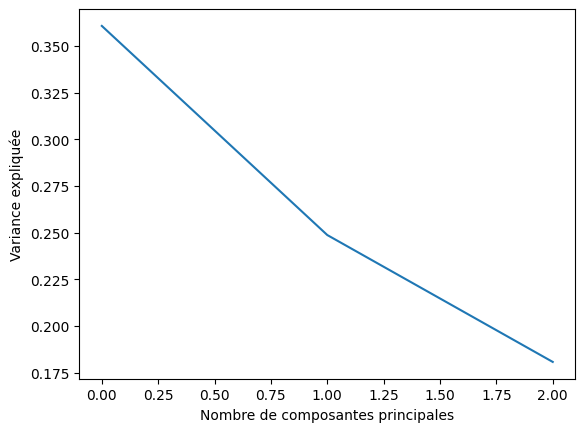

In [59]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel("Nombre de composantes principales")
plt.ylabel("Variance expliquée")
plt.show()

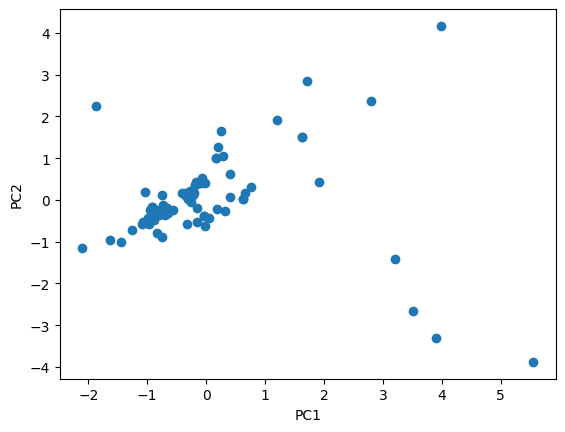

In [60]:
projections = pca.transform(scaled_data)

# Affichage des projections
plt.scatter(projections[:, 0], projections[:, 1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [17]:
from sklearn.manifold import TSNE

data3= df.copy()
categorical_columns = data3.select_dtypes(include=['object']).columns
categorical_data = data3[categorical_columns].drop("address", axis=1)  



#
numerical_columns = data3.select_dtypes(include=['float64', 'int64']).columns
imputed_data=data3[numerical_columns] = data3[numerical_columns].fillna(data3[numerical_columns].mean())  # Fill with mean


scaler = StandardScaler()
scaled_data = scaler.fit_transform(imputed_data)
tsne = TSNE(n_components=2, init='pca', random_state=42) 
tsne_components = tsne.fit_transform(scaled_data)
tsne_components


array([[-3.0734863 , -0.62057966],
       [-0.8859418 , -2.4459338 ],
       [-2.5108302 ,  1.6274583 ],
       [ 7.2376995 , -0.20740134],
       [ 5.3120174 , -0.9676536 ],
       [ 7.0802956 ,  0.6955245 ],
       [-5.3505416 ,  0.17250663],
       [ 2.3870964 , -3.821626  ],
       [ 0.846193  , -3.06928   ],
       [-3.4141972 ,  0.70150995],
       [ 0.1183942 , -0.78530395],
       [ 2.1969783 , -3.2371292 ],
       [-1.9279176 ,  2.853505  ],
       [ 2.2530828 ,  4.8747287 ],
       [ 3.5460162 , -3.4165287 ],
       [ 1.8552998 , -1.3755789 ],
       [-2.4785585 ,  3.2695947 ],
       [ 2.3157105 , -0.2395425 ],
       [ 4.252984  , -0.9913925 ],
       [-0.55412906,  0.2643436 ],
       [ 3.592416  , -2.05376   ],
       [ 5.171268  ,  0.1341284 ],
       [ 2.3157105 , -0.2395425 ],
       [-0.55412906,  0.2643436 ],
       [-1.9279176 ,  2.853505  ],
       [ 0.77519643, -4.0650415 ],
       [ 0.9425658 , -4.3013306 ],
       [ 7.113888  , -0.7530072 ],
       [ 6.373783  ,

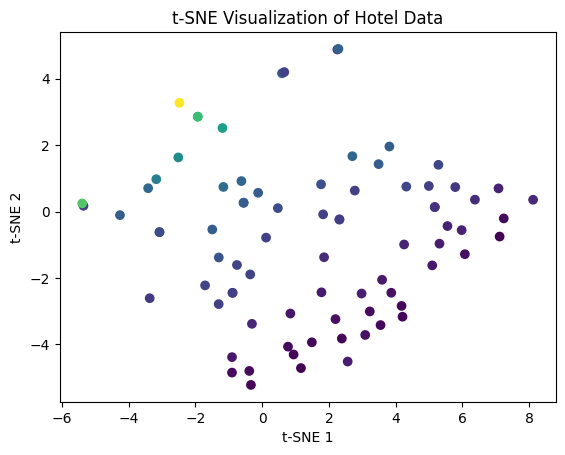

In [18]:

plt.scatter(tsne_components[:, 0], tsne_components[:, 1], c=data3["price"])  
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.title("t-SNE Visualization of Hotel Data")
plt.show()


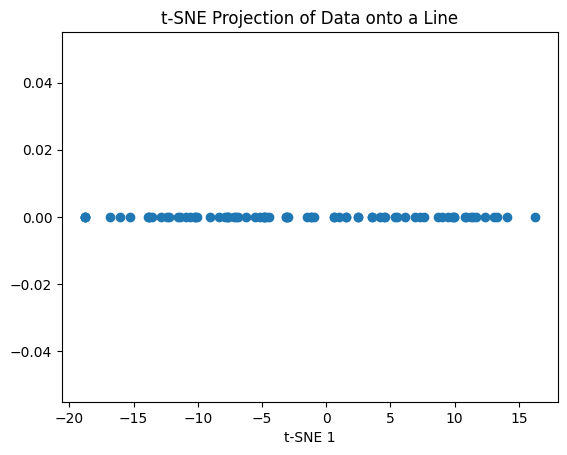

In [43]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE

# Assuming scaled_data and y have been checked for consistency:

tsne = TSNE(n_components=1, perplexity=10)
#tsne_components = tsne.fit_transform(scaled_data)

# Create the scatter plot with appropriate color-coding or removal:
if len(y) == len(scaled_data):
    plt.scatter(tsne_components[:, 0], np.zeros(len(tsne_components)), c=y)
else:
    plt.scatter(tsne_components[:, 0], np.zeros(len(tsne_components)))

plt.xlabel("t-SNE 1")
plt.title("t-SNE Projection of Data onto a Line")
plt.show()


In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
lda_components = lda.fit_transform(scaled_data, data3["address"])


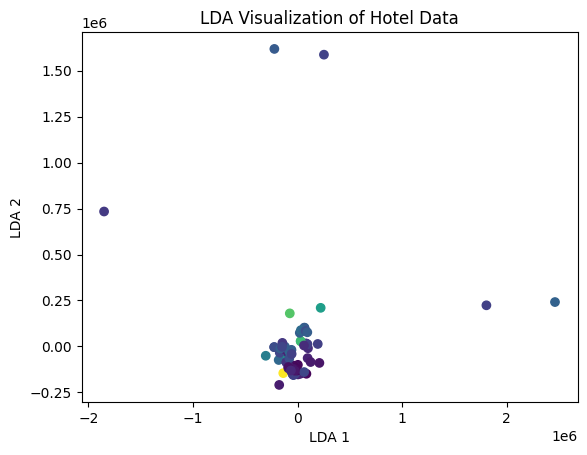

In [37]:
plt.scatter(lda_components[:, 0], lda_components[:, 1], c=data3["price"])
plt.xlabel("LDA 1")
plt.ylabel("LDA 2")
plt.title("LDA Visualization of Hotel Data")
plt.show()
